# Coffee Dataset Analysis
**Project Overview**

This project involves analyzing a coffee dataset containing information about various coffee samples, including their origins, ratings, and other attributes. The goal is to clean, explore, and analyze the data to uncover insights about coffee quality, origins, and trends.

**Objective**

The objective of this project is to analyze top-rated coffee products from around the world, clean and prepare the dataset for analysis, and build visual dashboards to uncover insights about coffee quality, pricing, and origin. The final goal is to identify trends such as whether higher-priced coffees tend to have higher quality scores, and to highlight countries producing the best-rated coffees.

**Problem Statement**

Coffee is one of the most consumed beverages globally, and quality can vary greatly depending on factors such as origin, processing, and price. Businesses, roasters, and coffee enthusiasts often need to know:

Which countries produce the highest-scoring coffee?

Is there a correlation between coffee price per ounce and its quality score?

Which coffee origins and varieties dominate the top ratings?

However, raw coffee data often contains inconsistencies, missing values, and unstructured formats (e.g., mixed units, text in numeric fields). This makes direct analysis challenging.
This project addresses the problem by:

1.Cleaning and standardizing the dataset (handling missing values, splitting mixed columns, converting units).

2.Analyzing key patterns in coffee ratings, prices, and origins.

3.Visualizing the findings through an interactive Power BI dashboard for easy interpretation.

**Step 1: Loading the data**

Import all the necessary libraries. The read_csv helps to read the csv file.

In [1]:
import numpy as np
import pandas as pd
rf=pd.read_csv("/content/top-rated-coffee - Copy.csv")

**Step 2: Check for the number of row and columns**

In [2]:
rf.shape

(2217, 7)

The info() provides you all thee information about the data the count,datatype, columns etc..

In [3]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   coffee_name       2217 non-null   object
 1   total_score       2217 non-null   object
 2   roaster_location  2217 non-null   object
 3   coffee_origin     2211 non-null   object
 4   roast_level       2193 non-null   object
 5   agtron            2217 non-null   object
 6   est._price        2103 non-null   object
dtypes: object(7)
memory usage: 121.4+ KB


**Step 3: Check for nulls and dropping it**

In [4]:
rf['coffee_origin'].isnull()

,coffee_origin
0,False
1,False
2,False
3,False
4,False
...,...
2212,True
2213,True
2214,True
2215,True


In [5]:
rf.dropna(subset=['coffee_origin'], inplace=True)

Step 4: We know that as we are dealing with the countries we have to sepearte the countries name which can be extracted from the coffee_origin.

In [7]:
rf['country']=rf['coffee_origin'].str.replace(r'\s*;\s*',',',regex=True)

In [8]:
rf['country']

,country
0,"Quindio Department, Colombia"
1,"Quindio Department, Colombia"
2,"Colombia,Ethiopia"
3,"Gimbo, Kaffa Province, Ethiopia"
4,"Sidamo growing region, southern Ethiopia"
...,...
2207,South-central Kenya
2208,Central Kenya
2209,South-central Kenya
2210,"Huehuetenango growing region, north-central Gu..."


In [9]:
rf['country'] = rf['coffee_origin'].str.strip().str.split(',').str[-1].str.strip()

**Step 5: Sort the values from highest to lowest.**

In [10]:
rf.sort_values(by='total_score',ascending=False,inplace=True)

**Step 6: This coulde be one of the crucial steps**

where we are dealing with the prices.So we do create a seperate column of the price and ounces by making all units to ounces and the find the price per ounce.

In [11]:
rf['est._price'].isnull().sum()

np.int64(109)

In [12]:
rf.dropna(subset=['est._price'],inplace=True)
rf['est._price']

,est._price
496,$20.00/8 ounces
1336,$100.00/21 grams
398,"NT$ 2,500/20 grams"
1150,$50.00/4 ounces
149,$99.95/8 ounces
...,...
952,$27.00/12 ounces
948,$24.95/4 ounces
947,$24.95/12 ounces
945,$18.95/12 ounces


In [13]:
rf['est._price'] = rf['est._price'].str.replace('oz.','ounces',regex=False)

In [14]:
df=rf.copy()
df['est._price']=df['est._price'].astype(str)
df['est._price']=df['est._price'].str.strip()
df=df[df['est._price'].str.contains('/',na=False)]
df[['prices_raw','ounces_raw']]=rf['est._price'].str.split('/',n=1,expand=True)
df['price']=df['prices_raw'].str.replace(r'[^\d.]','',regex=True)

In [15]:
def to_convert(ounces_raw):
  # Extract only numeric part from the string
  numeric_ounces = ''.join(filter(str.isdigit, ounces_raw))
  if not numeric_ounces:
    return None # Return None if no numeric part found

  if 'grams' in ounces_raw:
    grams=float(numeric_ounces)/28.3495
    return grams
  elif 'ounces' in ounces_raw or 'oz.'in 'ounces_raw': # Corrected variable name here
    ounces=float(numeric_ounces)
    return ounces
  else:
    return None
df['ounces']=df['ounces_raw'].apply(to_convert)

In [16]:
rf=df.copy()

In [17]:
rf['price_per_ounces']=rf['price'].astype(float)/rf['ounces']

In [18]:
rf['price_per_ounces']=rf['price_per_ounces'].sort_values(ascending=False)

**Step 7: Splitting the agtron to a whole_bean and ground_bean**

In [19]:
rf['agtron']=rf['agtron'].str.strip()
rf[['agtron_whole','agtron_ground']]=rf['agtron'].str.split('/',expand=True)

**Step 8: Download the modified file**

In [20]:
rf.to_csv("top_rated_coffee_clean.csv",index=False)

In [ ]:
from google.colab import files
files.download("top_rated_coffee_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**EDA**

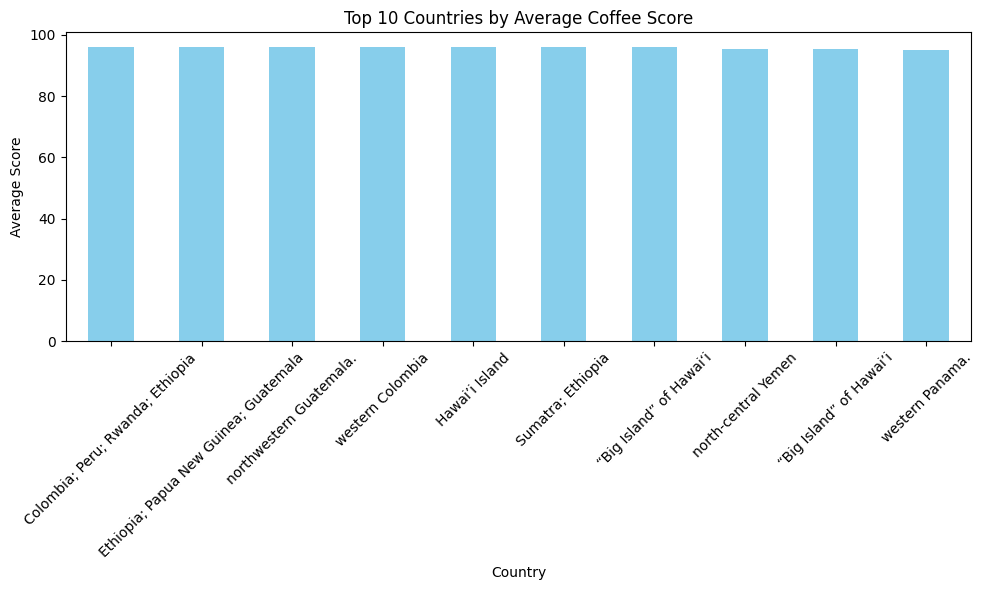

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/top_rated_coffee_clean.csv")

country_avg = df.groupby('country')['total_score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
country_avg.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Average Coffee Score")
plt.ylabel("Average Score")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

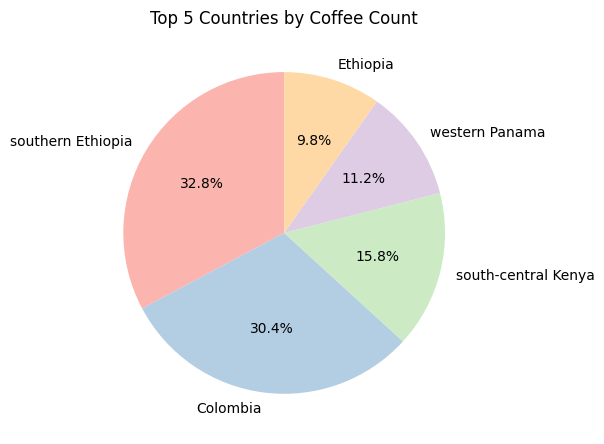

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/top_rated_coffee_clean.csv")

country_count = df['country'].value_counts().head(5)

plt.figure(figsize=(6, 6))
country_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Top 5 Countries by Coffee Count")
plt.ylabel("")
plt.tight_layout()
plt.show()
